<a href="https://githubtocolab.com/gee-community/geemap/blob/master/docs/notebooks/50_cartoee_quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

Uncomment the following line to install [geemap](https://geemap.org) and [cartopy](https://scitools.org.uk/cartopy/docs/latest/installing.html#installing) if needed. Keep in mind that cartopy can be challenging to install. If you are unable to install cartopy on your computer, you can try Google Colab with this the [notebook example](https://colab.research.google.com/github/gee-community/geemap/blob/master/docs/notebooks/cartoee_colab.ipynb).

See below the commands to install cartopy and geemap using conda/mamba:

```
conda create -n carto python=3.8
conda activate carto
conda install mamba -c conda-forge
mamba install cartopy scipy -c conda-forge
mamba install geemap -c conda-forge
jupyter notebook
```

In [ ]:
# !pip install cartopy scipy
# !pip install geemap

# How to create publication quality maps using `cartoee`

`cartoee` is a lightweight module to aid in creating publication quality maps from Earth Engine processing results without having to download data. The `cartoee` package does this by requesting png images from EE results (which are usually good enough for visualization) and `cartopy` is used to create the plots. Utility functions are available to create plot aesthetics such as gridlines or color bars. **The notebook and the geemap cartoee module ([cartoee.py](https://geemap.org/cartoee)) were contributed by [Kel Markert](https://github.com/KMarkert). A huge thank you to him.**

In [1]:
%pylab inline

import ee
import geemap
import matplotlib.pyplot as plt

# import the cartoee functionality from geemap
from geemap import cartoee

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
geemap.ee_initialize()

## Plotting an image

In this first example we will explore the most basic functionality including plotting and image, adding a colorbar, and adding visual aethetic features. Here we will use SRTM data to plot global elevation.

In [4]:
# get an image
srtm = ee.Image("CGIAR/SRTM90_V4")

In [5]:
# geospatial region in format [E,S,W,N]
region = [180, -60, -180, 85]  # define bounding box to request data
vis = {"min": 0, "max": 3000}  # define visualization parameters for image

c:\Users\ZHU\.conda\envs\GEE\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


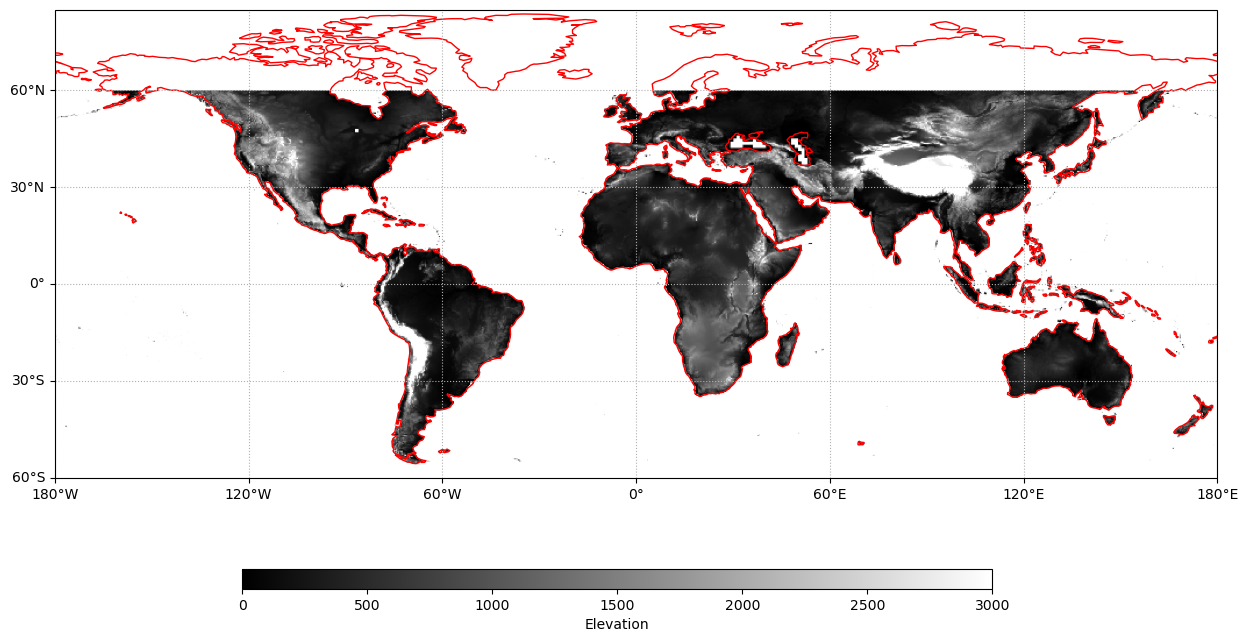

In [6]:
fig = plt.figure(figsize=(15, 10))

# use cartoee to get a map
ax = cartoee.get_map(srtm, region=region, vis_params=vis)

# add a colorbar to the map using the visualization params we passed to the map
cartoee.add_colorbar(ax, vis, loc="bottom", label="Elevation", orientation="horizontal")

# add gridlines to the map at a specified interval
cartoee.add_gridlines(ax, interval=[60, 30], linestyle=":")

# add coastlines using the cartopy api
ax.coastlines(color="red")

plt.show()

This is a decent map for minimal amount of code. But we can also easily use matplotlib colormaps to visualize our EE results to add more color. Here we add a `cmap` keyword to the `.get_map()` and `.add_colorbar()` functions.

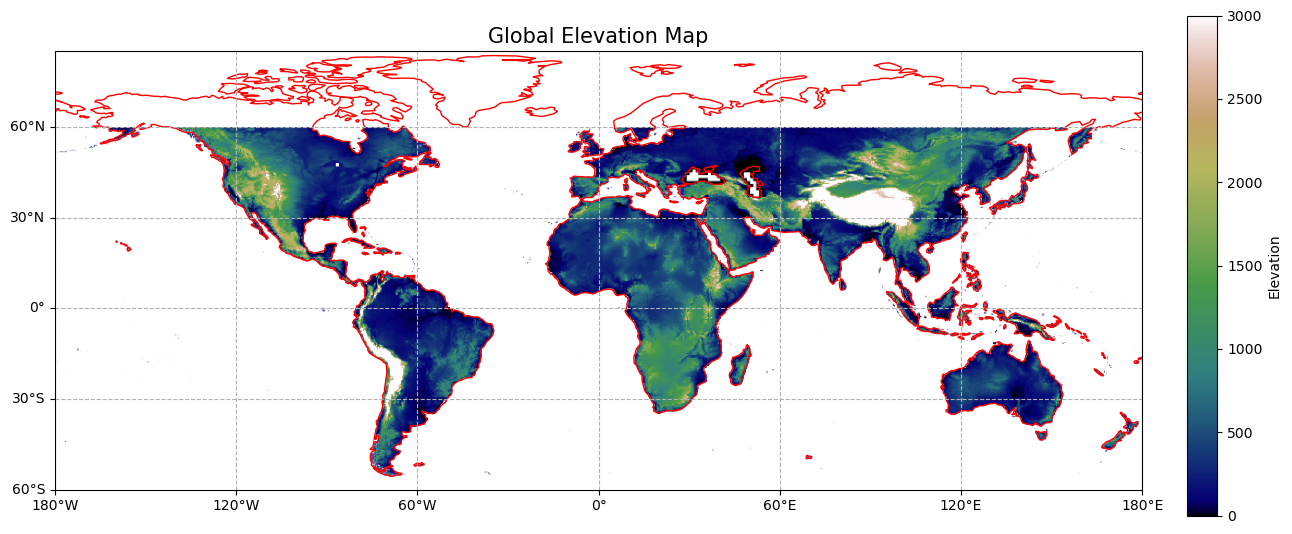

In [7]:
fig = plt.figure(figsize=(15, 10))

cmap = "gist_earth"  # colormap we want to use
# cmap = "terrain"

# use cartoee to get a map
ax = cartoee.get_map(srtm, region=region, vis_params=vis, cmap=cmap)

# add a colorbar to the map using the visualization params we passed to the map
cartoee.add_colorbar(
    ax, vis, cmap=cmap, loc="right", label="Elevation", orientation="vertical"
)

# add gridlines to the map at a specified interval
cartoee.add_gridlines(ax, interval=[60, 30], linestyle="--")

# add coastlines using the cartopy api
ax.coastlines(color="red")

ax.set_title(label="Global Elevation Map", fontsize=15)

plt.show()

## Plotting an RGB image

`cartoee` also allows for plotting of RGB image results directly. Here is an example of plotting a Landsat false-color scene.

In [8]:
# get a landsat image to visualize
image = ee.Image("LANDSAT/LC08/C01/T1_SR/LC08_044034_20140318")

# define the visualization parameters to view
vis = {"bands": ["B5", "B4", "B3"], "min": 0, "max": 5000, "gamma": 1.3}

EEException: Image.load: Image asset 'LANDSAT/LC08/C01/T1_SR/LC08_044034_20140318' not found (does not exist or caller does not have access).

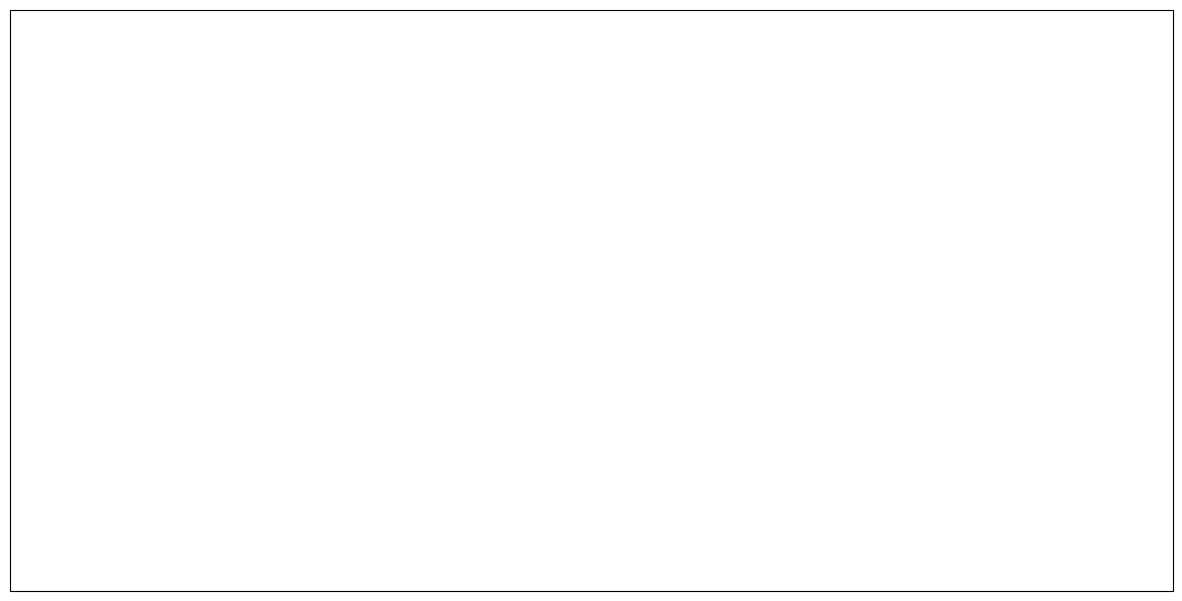

In [9]:
fig = plt.figure(figsize=(15, 10))

# use cartoee to get a map
ax = cartoee.get_map(image, vis_params=vis)

# pad the view for some visual appeal
cartoee.pad_view(ax)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=45, linestyle=":")

# add the coastline
ax.coastlines(color="yellow")

plt.show()

By default, if a region is not provided via the `region` keyword the whole extent of the image will be plotted as seen in the previous Landsat example. We can also zoom to a specific region of an image by defining the region to plot.

EEException: Image.load: Image asset 'LANDSAT/LC08/C01/T1_SR/LC08_044034_20140318' not found (does not exist or caller does not have access).

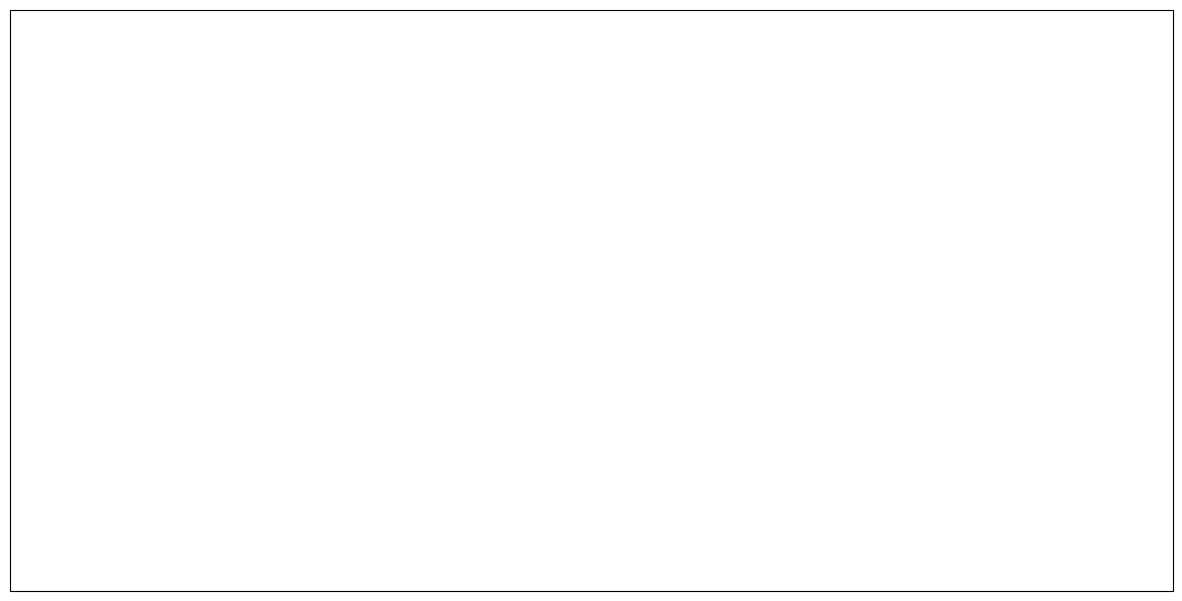

In [10]:
fig = plt.figure(figsize=(15, 10))

# here is the bounding box of the map extent we want to use
# formatted a [E,S,W,N]
zoom_region = [-121.8025, 37.3458, -122.6265, 37.9178]

# plot the map over the region of interest
ax = cartoee.get_map(image, vis_params=vis, region=zoom_region)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=0.15, xtick_rotation=45, linestyle=":")

# add coastline
ax.coastlines(color="yellow")

plt.show()

## Adding north arrow and scale bar

In [ ]:
fig = plt.figure(figsize=(15, 10))

# here is the bounding box of the map extent we want to use
# formatted a [E,S,W,N]
zoom_region = [-121.8025, 37.3458, -122.6265, 37.9178]

# plot the map over the region of interest
ax = cartoee.get_map(image, vis_params=vis, region=zoom_region)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=0.15, xtick_rotation=45, linestyle=":")

# add coastline
ax.coastlines(color="yellow")

# add north arrow
cartoee.add_north_arrow(
    ax, text="N", xy=(0.05, 0.25), text_color="white", arrow_color="white", fontsize=20
)

# add scale bar
cartoee.add_scale_bar_lite(
    ax, length=10, xy=(0.1, 0.05), fontsize=20, color="white", unit="km"
)

ax.set_title(label="Landsat False Color Composite (Band 5/4/3)", fontsize=15)

plt.show()